# Run the benchmark

In [ ]:
!python benchmark.py --frameworks tensorflow gensim originalc --file data/text8 --epochs 4 --batch_size 16 --workers 7 --size 100 

## Load Report file and define Visualization functions

In [1]:
%matplotlib inline

In [2]:
from textwrap import wrap
from numpy import linspace
import matplotlib
import matplotlib.pyplot as plt

f = open("./report/report.txt","r")
file_info = []
acc = [] # accumulator for set of lines
for line in f.readlines():
    if(line=='\n'):
        file_info.append(acc)
        acc =[]
        continue
    acc.append(line.rstrip())
f.close()

sys_info = file_info[0]
config_str = file_info[1][0]
time_mem_report_lines = file_info[2]
qa_report_lines = file_info[3]
word_pairs_eval_lines = file_info[4]

def plot_word_eval_report(lines, title, analogies=True):
    """
    Plot the eval-word-vectors report and save to a .jpg figure.

    """
    lines = [line.rstrip('\n').split() for line in lines]
    results = zip(*lines[:])
    num_frameworks = len(set(results[0]))
    num_datasets = len(lines) / num_frameworks
    frameworks = results[0][::num_datasets]
    fig = plt.figure(figsize=(40, 25))
    ax = fig.add_subplot(111)
    pos = [linspace(i + 0.25, i + 0.75, num=num_frameworks, endpoint=False) for i in range(num_datasets)]
    width = pos[0][1] - pos[0][0]
    colors = ['red', 'black', 'yellow', 'blue', 'green', 'orange', 'grey']
    # Plot each dataset
    for i in range(num_datasets):
        ax.bar(pos[i],
            results[2][i::num_datasets],
            width,
            alpha=0.5,
            color=colors
            )
    if analogies:
        ax.set_ylabel('Accuracy (%)')
        ax.set_xlabel('Section')
    else:
        ax.set_ylabel('Spearman\'s Rho')
        ax.set_xlabel('Dataset')
    ax.set_xticks([0.5 + i for i in range(num_datasets)])
    ax.set_xticklabels(results[1][:num_datasets], rotation=45, fontsize='large')
    ax.set_title(title)
    # Proxy plots for adding legend correctly
    proxies = [ax.bar([0], [0], width=0, color=colors[i], alpha=0.5)[0] for i in range(num_frameworks)]
    plt.legend((proxies), frameworks, loc='best', prop={'size': 30})
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_yticklabels():
        item.set_fontsize(30)
    # ax.get_xticklabels().set_fontsize(20)
    plt.grid()
    plt.show()
    return

def plot_time_peak_mem(lines, config_str):
    """
    Plot the training time and peak memory reports and save to a .jpg figure.

    """
    lines = [line.rstrip('\n').split() for line in lines]
    results = zip(*lines[:])
    frameworks = results[0]
    train_times = results[1]
    peak_mems = results[2]
    print frameworks
    fig = plt.figure(figsize=(10, 15))
    ax = fig.add_subplot(111)
    pos = [linspace(i + 0.25, i + 0.75, num=len(frameworks), endpoint=False) for i in range(2)]
    width = pos[0][1] - pos[0][0]
    colors = ['red', 'black', 'yellow', 'blue', 'green', 'orange', 'grey']
    acc_ax = ax.twinx()
    # Training time
    ax.bar(pos[0],
            train_times,
            width,
            alpha=0.5,
            color=colors
            )
    # Peak Memory
    acc_ax.bar(pos[1],
            peak_mems,
            width,
            alpha=0.5,
            color=colors
            )
    ax.set_title('Time-Memory Report')
    ax.set_ylabel('Training time (seconds)')
    acc_ax.set_ylabel('Peak Memory (MB)')
    ax.set_xlabel("\n".join(wrap(config_str, 60)))  # wrap xlabel text
    acc_ax.set_xticks([p[0] + 1.5 * width for p in pos])
    acc_ax.set_xticklabels([''] * 2)  # use empty labels to hide xticklabels
    # Proxy plots for adding legend correctly
    proxies = [ax.bar([0], [0], width=0, color=colors[i], alpha=0.5)[0] for i in range(len(frameworks))]
    plt.legend((proxies), frameworks, loc='best')
    plt.grid()
    plt.show()
    return

## System Information

In [3]:
for info in sys_info:
    print info

CPU INFO
Model name:Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz , Architecture:x86_64 , CPU(s):8 , MemTotal:16384112 kB ,
GPU INFO
Model Name : GeForce GTX 1060, Total FB Memory : 3011 MiB


# Display generated graphics

Time to train(in seconds) and peak memory(in MiB) results

('tensorflow', 'tensorflow-gpu', 'gensim', 'originalc', 'dl4j')


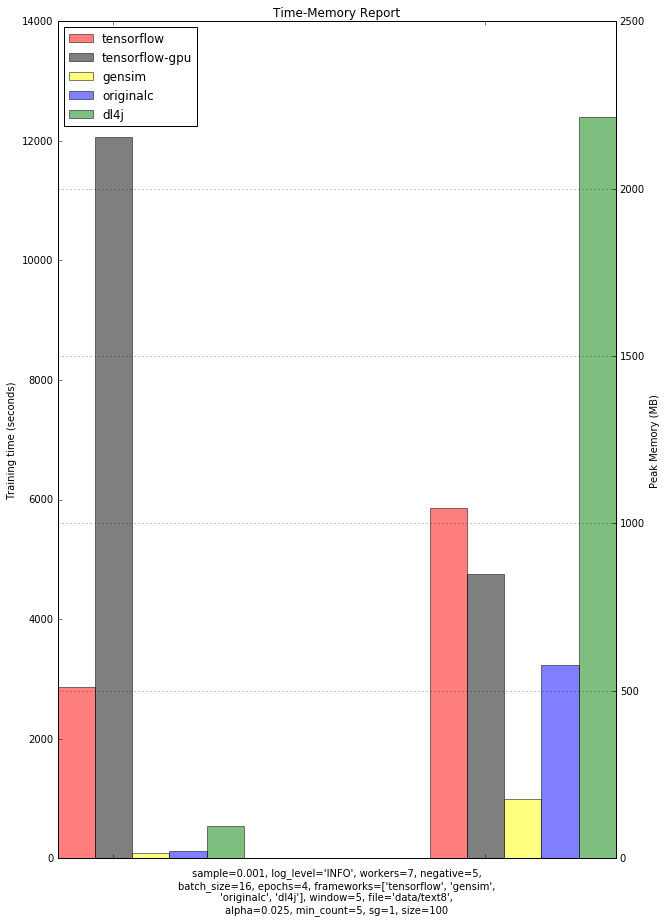

In [4]:
plot_time_peak_mem(time_mem_report_lines, config_str)

Results of evaluation on the popular **Word Similarities** task. This task measures how well the notion of word similarity according to humans is captured by the word vector representations. Two lists are obtained by sorting the word pairs according to human similarity and vector-space similarity. Spearman’s correlation/rho between these
ranked lists is the used to signify how well the vector space agrees with human judgement. 

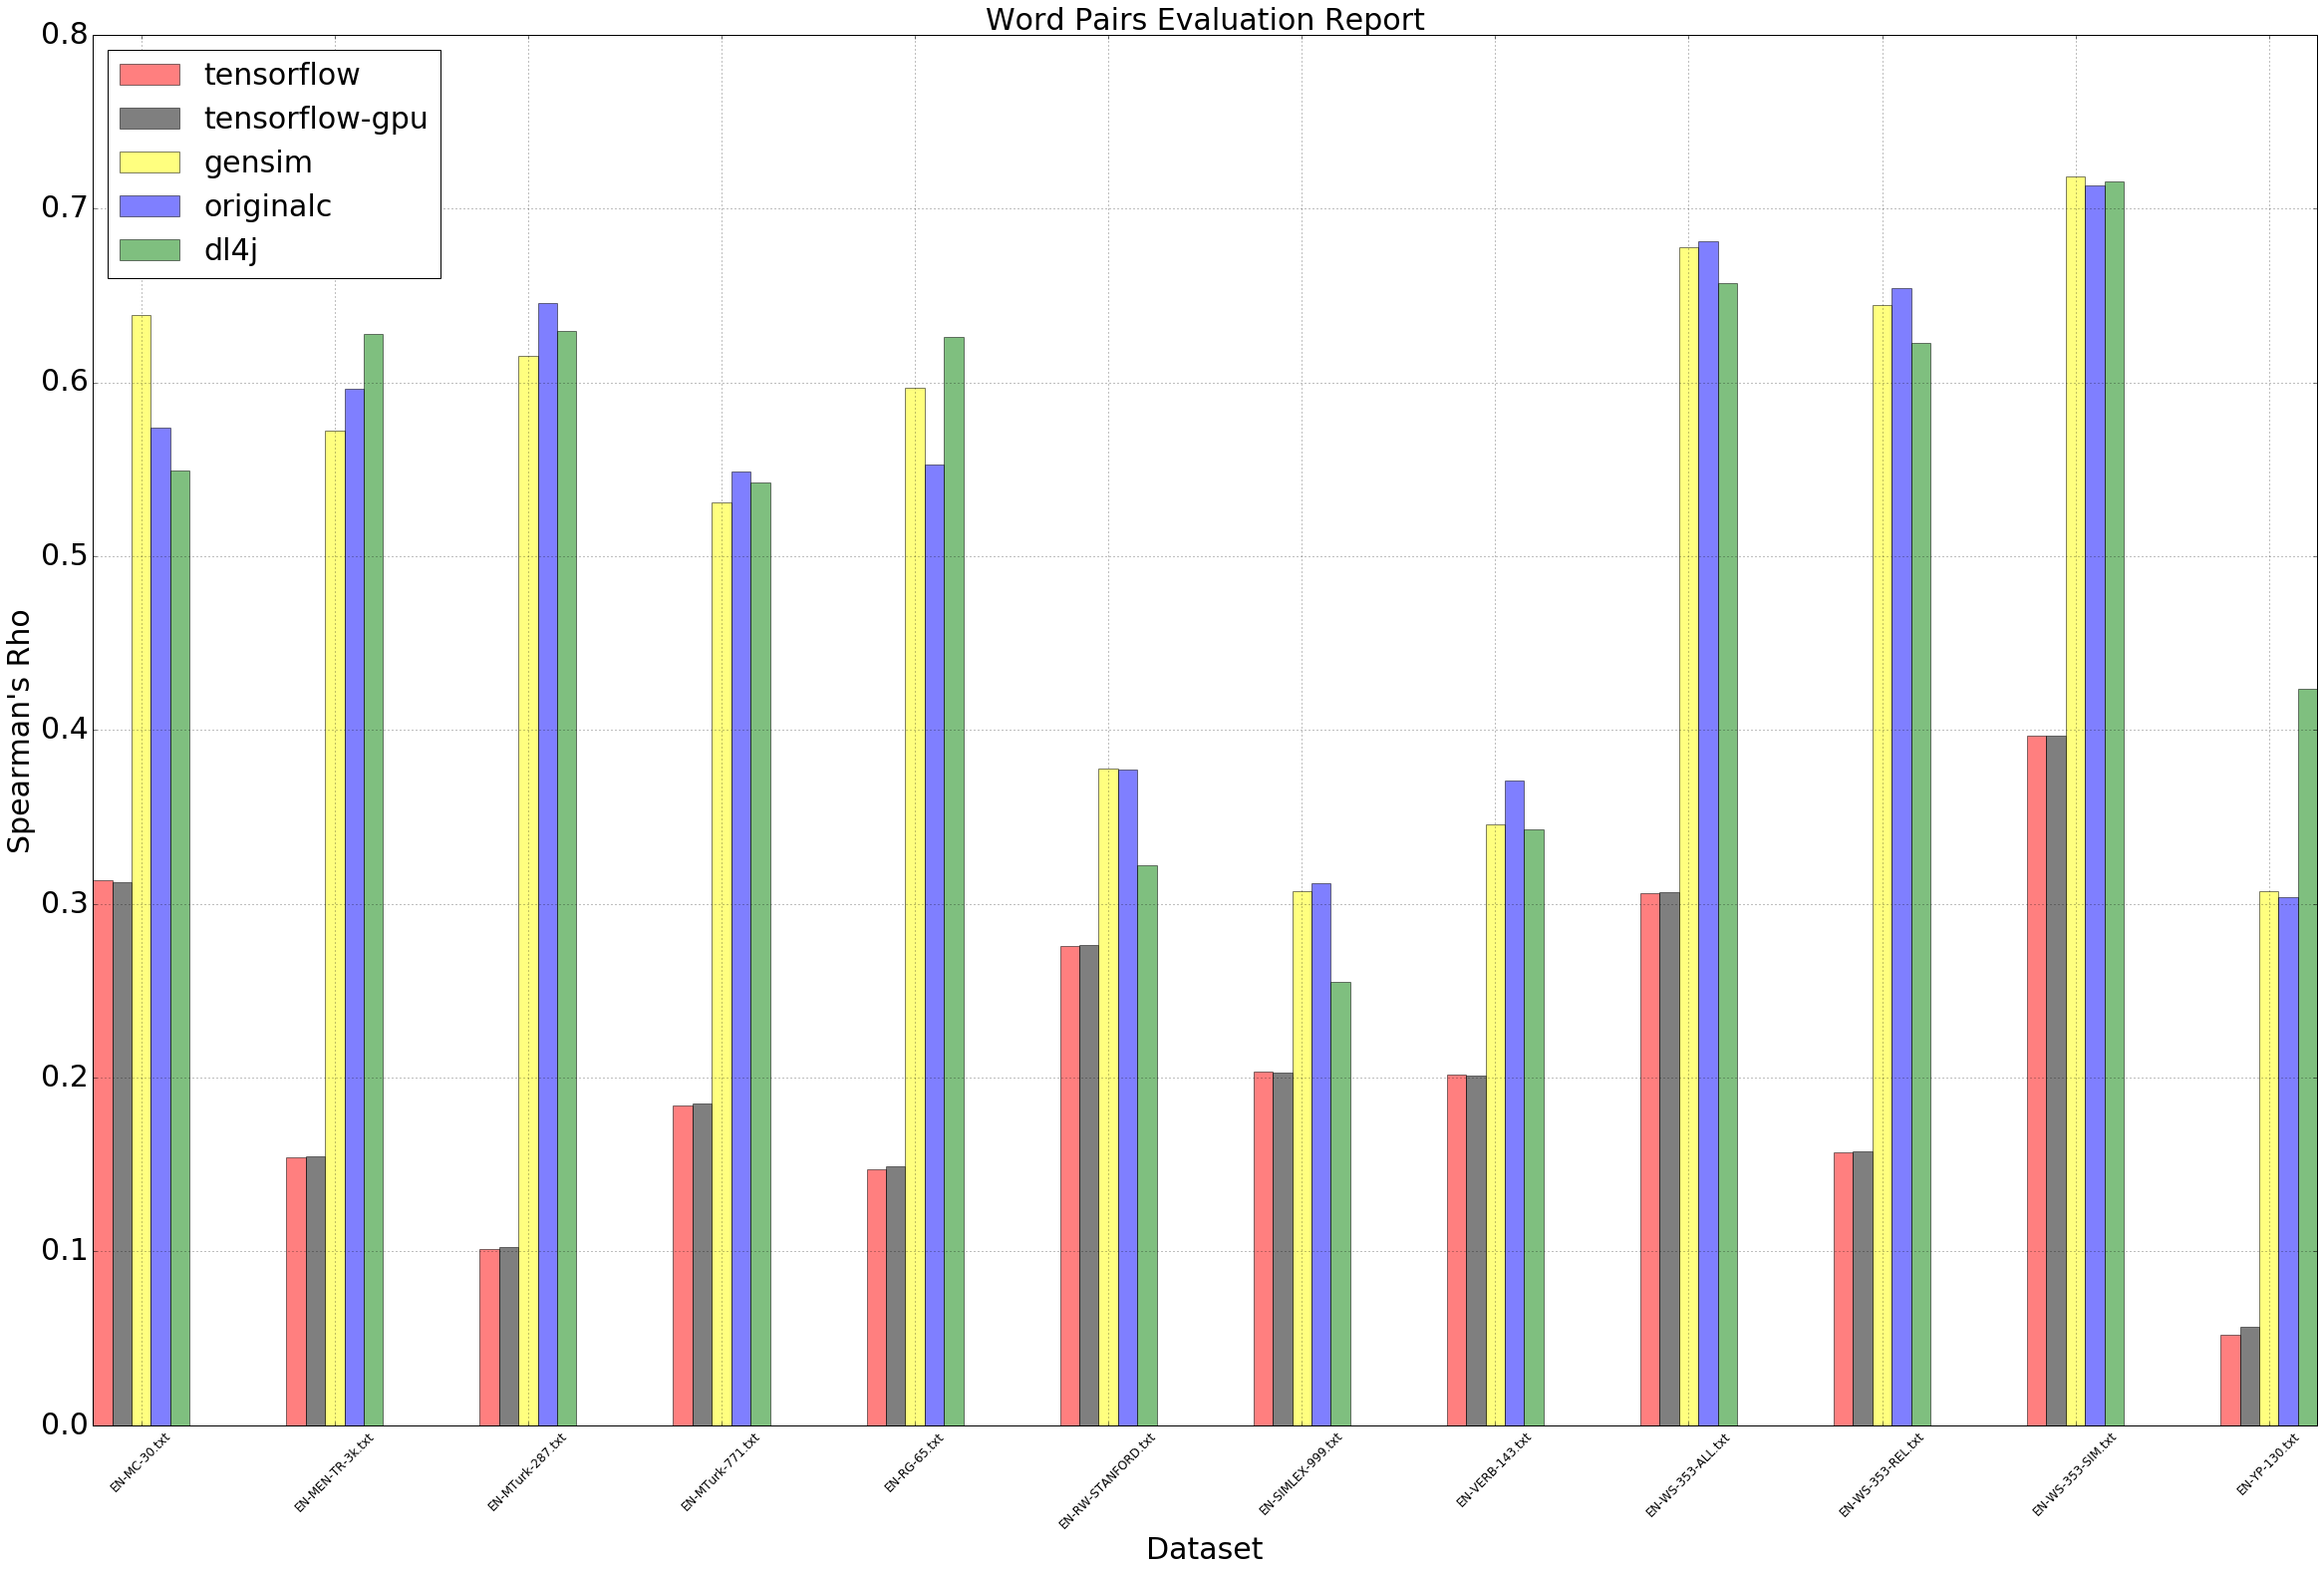

In [5]:
plot_word_eval_report(word_pairs_eval_lines, 'Word Pairs Evaluation Report', analogies=False)

Results of evaluation on the popular **Word Analogy** task. The aim of this task is to find the missing word b' in the relation: a is to a' as b is to b'. In other words we look at the most similar word vector to b' (= a' + b - a) and compare it with the human analogy and report the accuracy. 

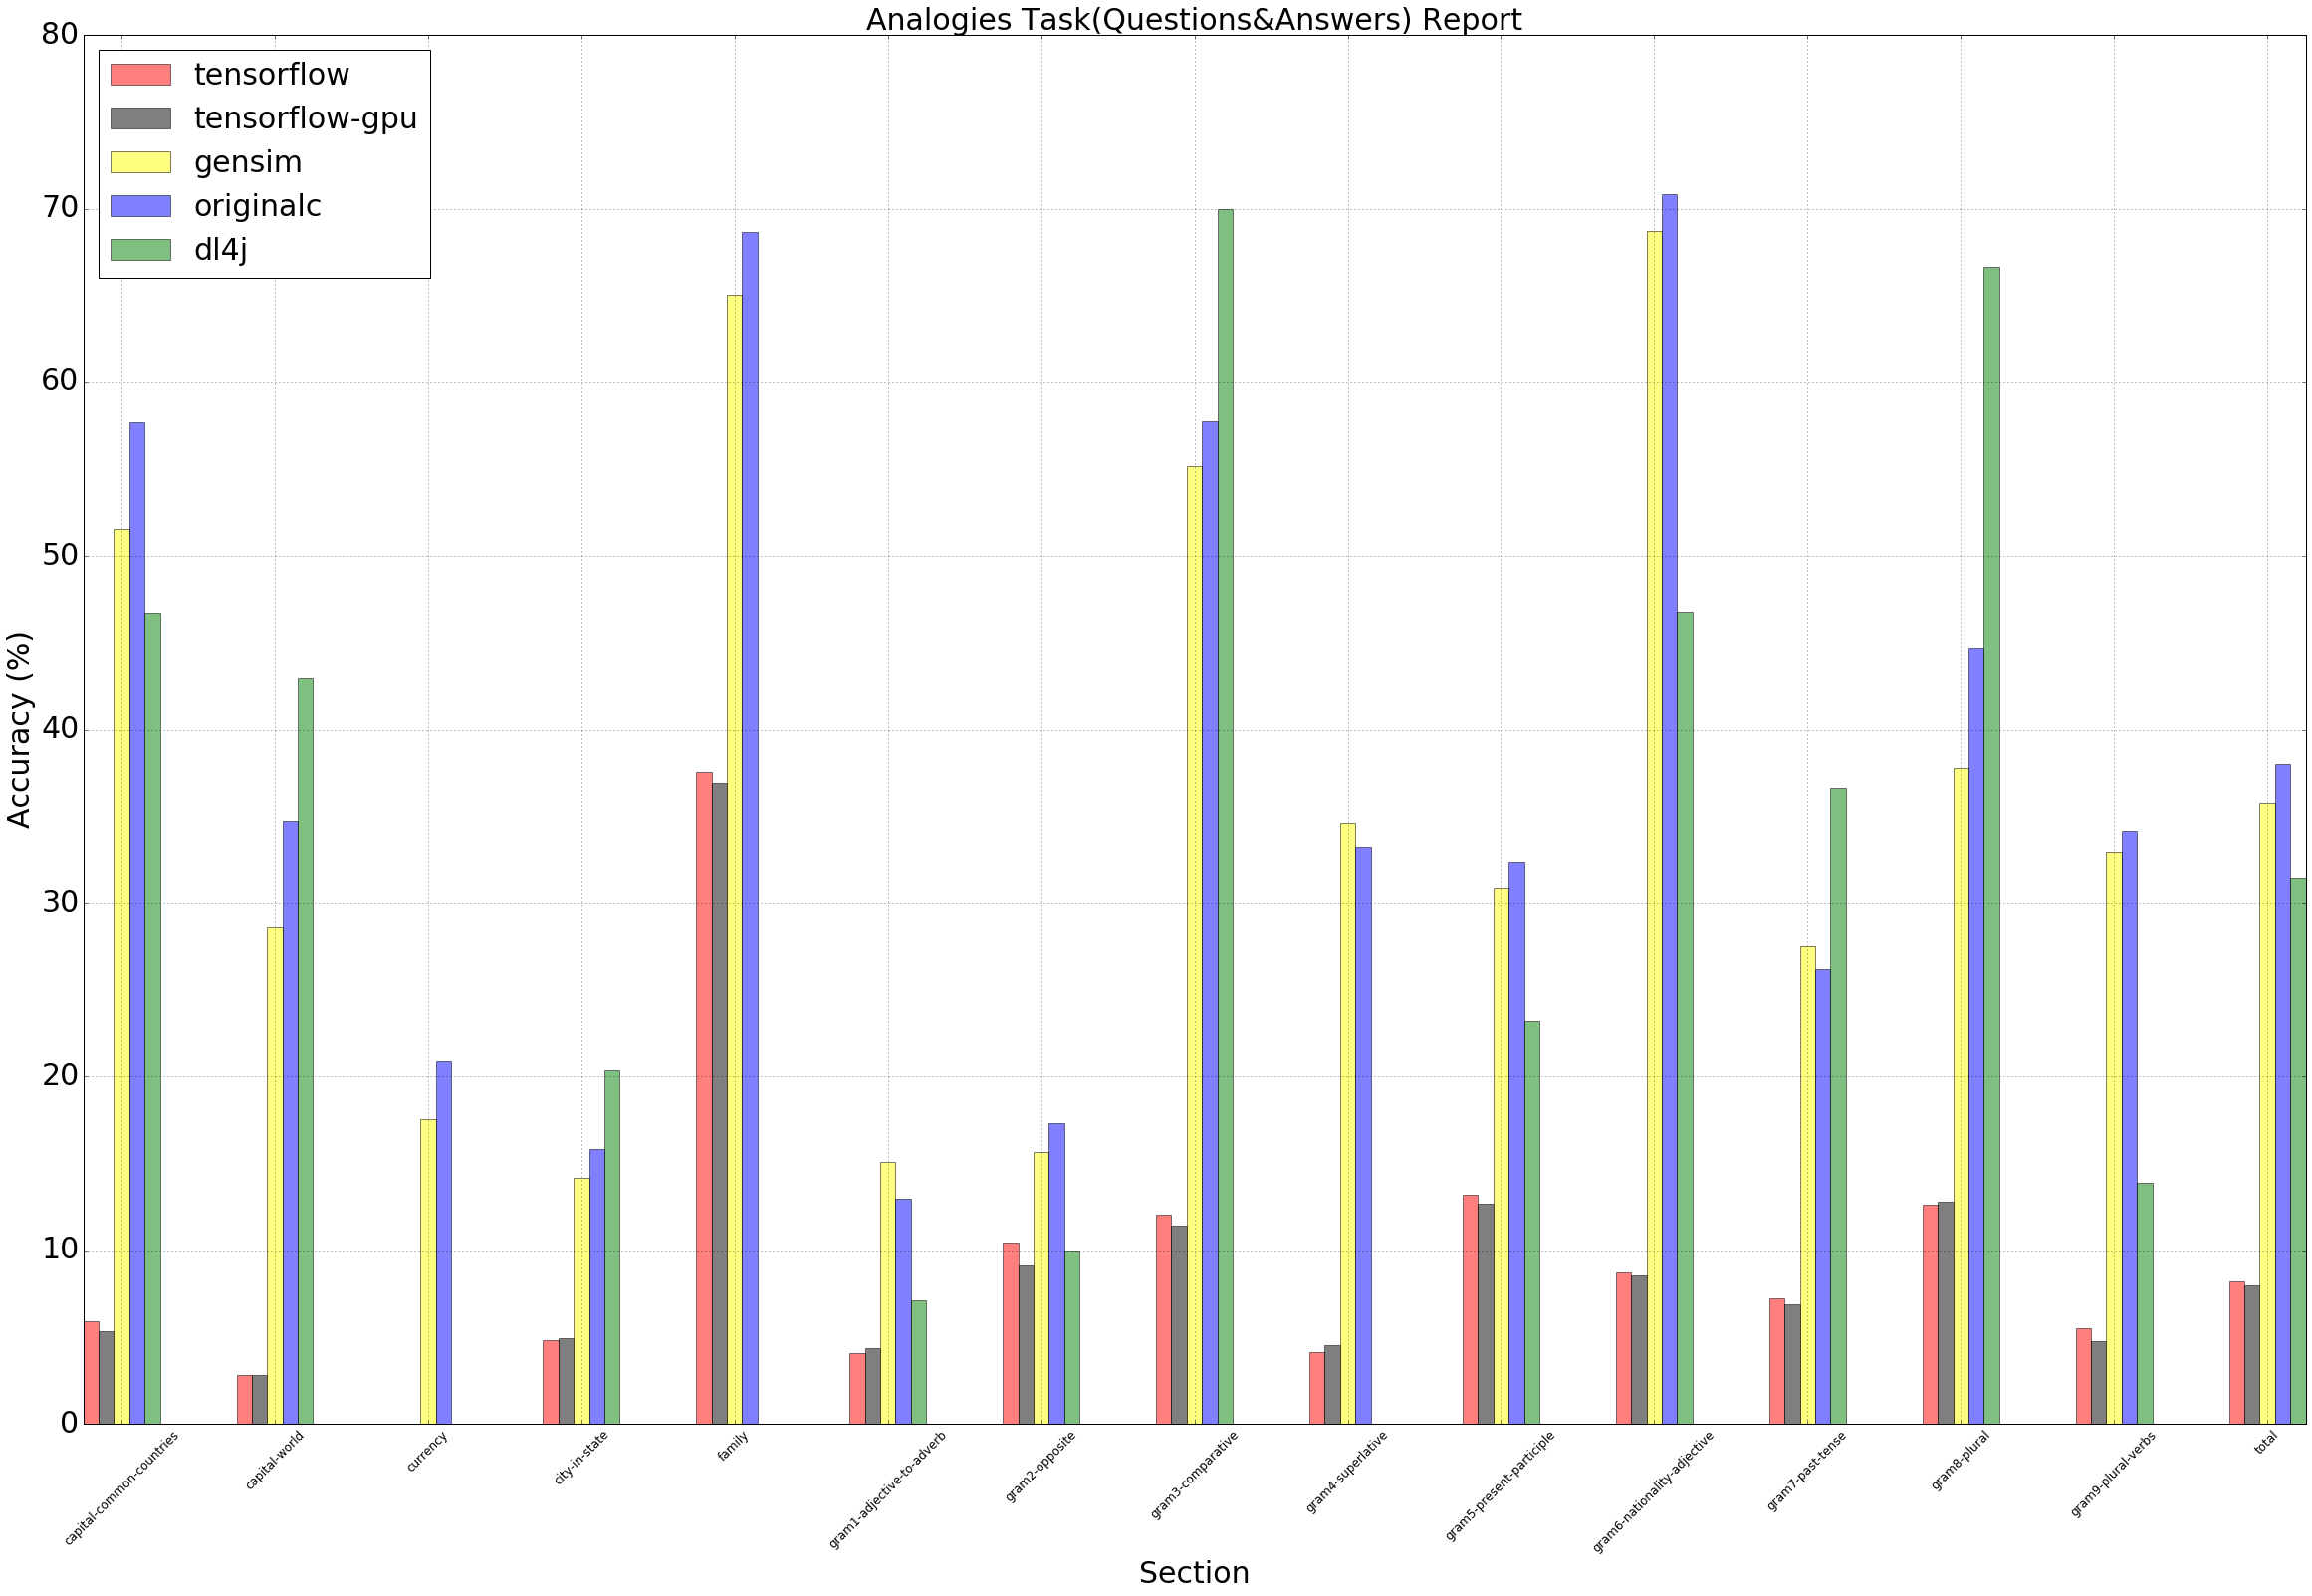

In [6]:
plot_word_eval_report(qa_report_lines, 'Analogies Task(Questions&Answers) Report', analogies=True)